In [4]:
import json
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import elasticsearch
import wordcloud

client = elasticsearch.Elasticsearch('localhost:9200')
client.info()

{'name': 'LAPTOP-HOFG0F6S',
 'cluster_name': 'elasticsearch',
 'cluster_uuid': '6GIazPz8RWW2xepk3AnbSA',
 'version': {'number': '7.9.3',
  'build_flavor': 'unknown',
  'build_type': 'unknown',
  'build_hash': 'c4138e51121ef06a6404866cddc601906fe5c868',
  'build_date': '2020-10-16T10:36:16.141335Z',
  'build_snapshot': False,
  'lucene_version': '8.6.2',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [9]:
query = {
  "aggregations": {
    "termos": {
      "terms": {
        "field": "tweet",
        "exclude": "nao|vc|pq|ai|q|ta|http|pra|t.co|sao|to|voce|so",
        "size": 100
      }
    }
  },
  "query": {"match_all": {}},
  "size": 0
}

results = client.search(index="tweets2021", body=query)

In [10]:
buckets = results['aggregations']['termos']['buckets']

In [11]:
buckets

[{'key': '2021', 'doc_count': 47252},
 {'key': 'ano', 'doc_count': 17246},
 {'key': '2020', 'doc_count': 10009},
 {'key': 'feliz', 'doc_count': 7795},
 {'key': 'todo', 'doc_count': 7588},
 {'key': 'novo', 'doc_count': 6666},
 {'key': 'tudo', 'doc_count': 5581},
 {'key': 'vai', 'doc_count': 4959},
 {'key': 'ser', 'doc_count': 4931},
 {'key': 'espero', 'doc_count': 4828},
 {'key': 'melhor', 'doc_count': 4744},
 {'key': 'vida', 'doc_count': 4262},
 {'key': 'vou', 'doc_count': 4189},
 {'key': 'deu', 'doc_count': 4065},
 {'key': 'coisa', 'doc_count': 3873},
 {'key': 'dia', 'doc_count': 3822},
 {'key': 'pessoa', 'doc_count': 3783},
 {'key': 'ja', 'doc_count': 3600},
 {'key': 'gent', 'doc_count': 3491},
 {'key': 'ter', 'doc_count': 3481},
 {'key': 'muita', 'doc_count': 3404},
 {'key': 'saud', 'doc_count': 3092},
 {'key': 'quero', 'doc_count': 2707},
 {'key': 'aqui', 'doc_count': 2548},
 {'key': 'ainda', 'doc_count': 2480},
 {'key': 'fazer', 'doc_count': 2461},
 {'key': 'bom', 'doc_count': 237

(-0.5, 399.5, 199.5, -0.5)

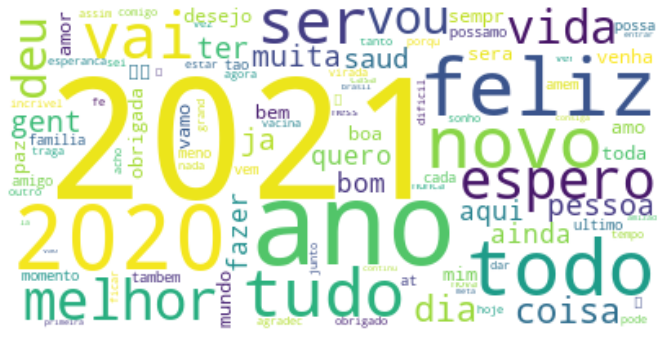

In [21]:
frequencies = {}
for bucket in buckets:
    frequencies[bucket['key']] = bucket['doc_count']

cloud = wordcloud.WordCloud(background_color="white")
#cloud = wordcloud.WordCloud()
cloud.generate_from_frequencies(frequencies)

fig, ax = plt.subplots(figsize=(16,6))
ax.imshow(cloud, interpolation='bilinear')
#ax.imshow(cloud, interpolation='bilinear')
ax.axis('off')